<a href="https://colab.research.google.com/github/mohsenshekarabi/homework2_datamining/blob/main/CompareModelsPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
#The Data frame has been assigned a name of ‘diabetes_dataset’
diabetes_dataset = pd.read_csv("https://github.com/mohsenshekarabi/homework2_datamining/blob/main/diabetes_dataset.csv?raw=true")

In [63]:
diabetes_dataset.shape

(768, 9)

In [64]:
diabetes_dataset.head(3)

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [65]:
#@title Split dataset train and test
from sklearn.model_selection import train_test_split 

train,test = train_test_split(diabetes_dataset, test_size=0.25, random_state=0, stratify=diabetes_dataset['class']) 

x_train = train[train.columns[:8]]
x_test = test[test.columns[:8]]
y_train = train['class']
y_test = test['class']

In [66]:
#@title Preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [67]:
#@title Logistic Regression Model
from sklearn.linear_model import LogisticRegression

LogisticReg = LogisticRegression()

LogisticReg.fit(x_train, y_train)

y_pred_LogReg = LogisticReg.predict(x_test)

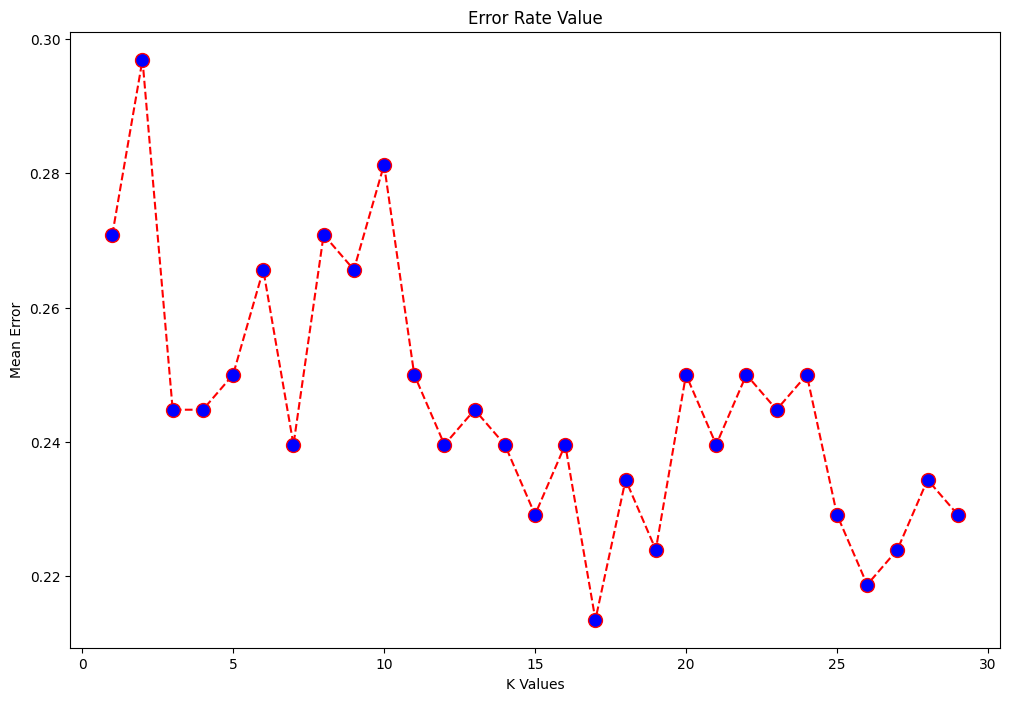

In [68]:
#@title K  Nearest Neighbor Model 

from sklearn.neighbors import KNeighborsClassifier

knn_i = []
y_pred_knn_i = []
mean_error_i = []

for i in range(1, 30):
  knn_i.append(KNeighborsClassifier(n_neighbors = i))
  knn_i[i - 1].fit(x_train, y_train)
  y_pred_knn_i.append(knn_i[i - 1].predict(x_test))
  mean_error_i.append(np.mean(y_pred_knn_i[i-1] != y_test))

plt.figure(figsize=(12,8))
plt.plot(range(1,30),mean_error_i,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate Value')
plt.xlabel('K Values')
plt.ylabel('Mean Error')

index = mean_error_i.index(min(mean_error_i))

k = index + 1

knn = knn_i[index]


y_pred_knn = y_pred_knn_i[index]


In [69]:
#@title Naive Bayes Model

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train, y_train)

y_pred_gnb = gnb.predict(x_test)


In [70]:
#@title Calculate accuracy for each predictions model
from sklearn import metrics

accuracy_models = {'Logistic Regression':metrics.accuracy_score(y_test, y_pred_LogReg),
                   'K Nearest Neighbor':metrics.accuracy_score(y_test, y_pred_knn),
                   'Naive Bayes':metrics.accuracy_score(y_test, y_pred_gnb)}

print(accuracy_models)

{'Logistic Regression': 0.78125, 'K Nearest Neighbor': 0.7864583333333334, 'Naive Bayes': 0.765625}


In [71]:
#@title Confusion Matrix for each predictions model
from sklearn import metrics

confusion_matrix_models = {'Logistic Regression':metrics.confusion_matrix(y_test, y_pred_LogReg),
                   'K Nearest Neighbor':metrics.confusion_matrix(y_test, y_pred_knn),
                   'Naive Bayes':metrics.confusion_matrix(y_test, y_pred_gnb)}

confusion_matrix_models

{'Logistic Regression': array([[111,  14],
        [ 28,  39]]),
 'K Nearest Neighbor': array([[112,  13],
        [ 28,  39]]),
 'Naive Bayes': array([[105,  20],
        [ 25,  42]])}

Text(0.5, 1.0, 'Binary Class ROC curve')

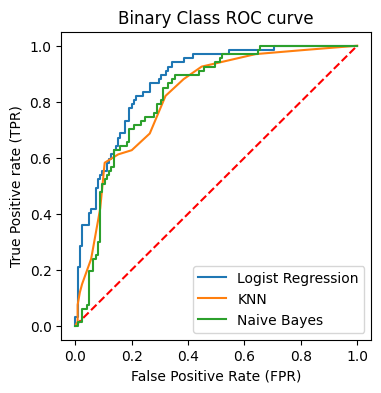

In [72]:
#@title ROC curve for each predictions model
from sklearn.metrics import roc_curve, roc_auc_score
prob_logreg = LogisticReg.predict_proba(x_test)[:,1]
fp_logreg, tp_logreg, e_logreg = roc_curve(y_test, prob_logreg,pos_label=1)

prob_knn = knn.predict_proba(x_test)[:,1]
fp_knn, tp_knn, e_knn = roc_curve(y_test, prob_knn,pos_label=1)

prob_gnb = gnb.predict_proba(x_test)[:,1]
fp_gnb, tp_gnb, e_gnb = roc_curve(y_test, prob_gnb,pos_label=1)

plt.figure(figsize = (4,4))
plt.plot([0,1], [0,1], "r--")

plt.plot(fp_logreg, tp_logreg, label='Logist Regression')
plt.plot(fp_knn, tp_knn, label='KNN')
plt.plot(fp_gnb, tp_gnb, label='Naive Bayes')

plt.legend()
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive rate (TPR)')
plt.title('Binary Class ROC curve')